In [1]:
import numpy as np
import scipy.special as ss
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings


plt.style.use("MATPLOTLIB_RCPARAMS.sty")
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}' 

warnings.filterwarnings("ignore")

In [2]:
# scalar spherical harmonics
def spherical_harmonic(theta, phi, l, m):
    coeff = np.sqrt((2*l+1) * np.math.factorial(l - abs(m)) / (4*np.pi*np.math.factorial(l + abs(m))))
    term1 = np.exp(1j * m * phi)
    term2 = np.polynomial.Legendre((2*l+1))(np.cos(theta))
    return coeff * term1 * term2


# swsh
def swsh(s, l, m, th, ph):
    sqrt_term = np.sqrt((np.math.factorial(l + m)*np.math.factorial(l - m)*(2*l + 1))/(4*np.pi*np.math.factorial(l + s)*np.math.factorial(l - s)))
    sin_e_term = np.sin(th/2)**(2*l)*np.exp(1j*m*ph)
    sum_term = 0.
    r = 0
    while r <= l-s:
        sum_term += (-1)**r *ss.binom(l - s, r)*ss.binom(l + s, r + s - m)*1/(np.tan(th/2)**(2*r + s - m))
        r += 1

    return (-1)**(l + m - s)*sqrt_term*sin_e_term*sum_term

In [3]:
swsh(-2, 2, 1, 0.001, 0.0001)

(0.0006307828645248658+6.307828666274755e-08j)

In [51]:
size = 36

params = {'xtick.labelsize' : size, 
          'ytick.labelsize' : size, 
          'axes.labelsize' : size, 
          'legend.fontsize' : size, 
          'font.size' : size,
          'axes.titlesize': size
         }
plt.rcParams.update(params)

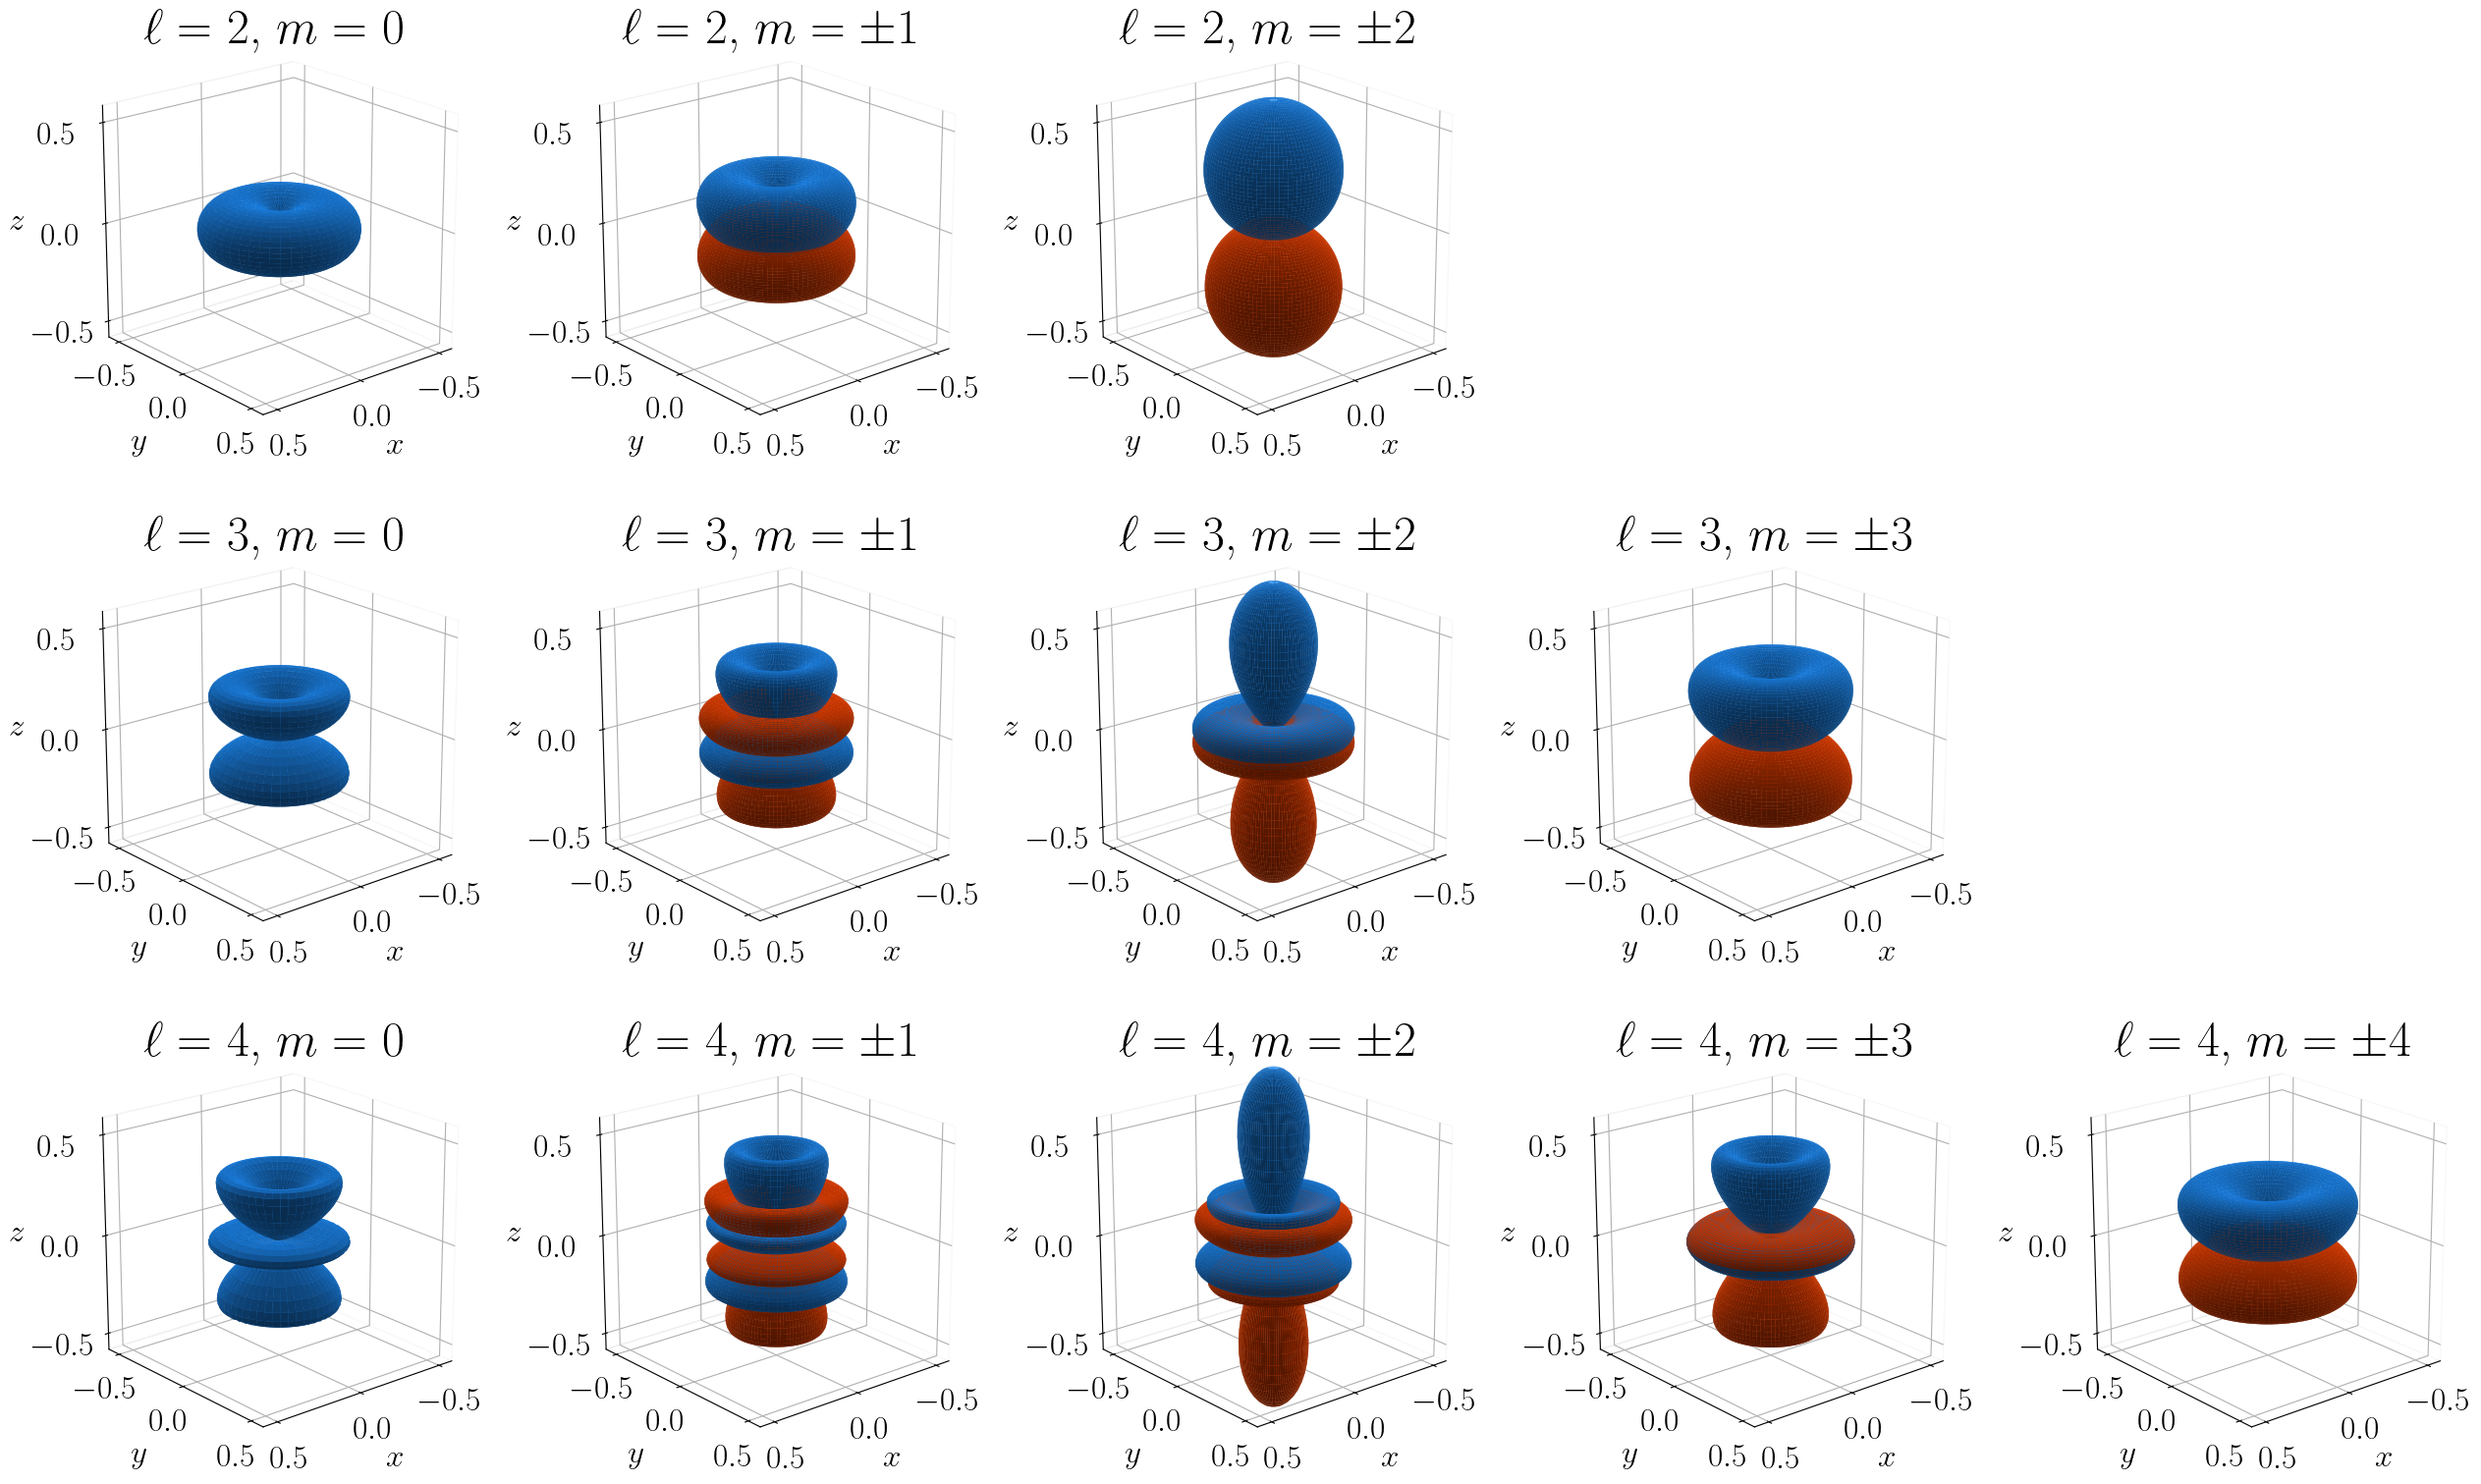

In [76]:
s = -2
l_values = [2, 3, 4]             
m_values = [0, 1, 2, 3, 4]     
theta = np.linspace(0, np.pi, 100)  
phi = np.linspace(0, 2*np.pi, 100)  
theta_mesh, phi_mesh = np.meshgrid(theta, phi)

fig, axes = plt.subplots(len(l_values), len(m_values), figsize=(28, 16), subplot_kw={'projection': '3d'})
lim_axes = 0.56

for i, l in enumerate(l_values):
    for j, m in enumerate(m_values):
        ax = axes[i, j]
        if m <= l:
            if m !=0:
                ax.set_title(f'$\ell=$ {l}, $m=\pm${m}',  y=1.02)
                r1 = np.abs(swsh(s, l, m, theta_mesh, phi_mesh))
                x1 = r1 * np.sin(theta_mesh) * np.cos(phi_mesh)
                y1 = r1 * np.sin(theta_mesh) * np.sin(phi_mesh)
                z1 = r1 * np.cos(theta_mesh)
                r2 = np.abs(swsh(s, l, -m, theta_mesh, phi_mesh))
                x2 = r2 * np.sin(theta_mesh) * np.cos(phi_mesh)
                y2 = r2 * np.sin(theta_mesh) * np.sin(phi_mesh)
                z2 = r2 * np.cos(theta_mesh)
                color1 = np.empty_like(x1, dtype=np.object)
                color1.fill('#1E90FF')  # 30, 144, 255 dogerblue
                color2 = np.empty_like(x1, dtype=np.object)
                color2.fill('#FF4500')  # orangered

                # Create a white bridge region
                X_bridge = np.vstack([x1[-1,:],x2[0,:]])
                Y_bridge = np.vstack([y1[-1,:],y2[0,:]])
                Z_bridge = np.vstack([z1[-1,:],z2[0,:]])
                color_bridge = np.empty_like(Z_bridge, dtype=object)
                color_bridge.fill((1,1,1,0))

                # Join the two surfaces (using also the bridge)
                X_full = np.vstack([x1, X_bridge, x2])
                Y_full = np.vstack([y1, Y_bridge, y2])
                Z_full = np.vstack([z1, Z_bridge, z2])
                color_full = np.vstack([color1, color_bridge, color2])
                
                
                surf_full = ax.plot_surface(X_full, Y_full, Z_full, rstride=1, cstride=1,
                                    facecolors=color_full, linewidth=0, rasterized=True)
                ax.view_init(azim=50, elev=20)
        
            else: 
                ax.set_title(f'$\ell=$ {l}, $m=$ {m}', y=1.02)
                r = np.abs(swsh(s, l, m, theta_mesh, phi_mesh))
                x = r * np.sin(theta_mesh) * np.cos(phi_mesh)
                y = r * np.sin(theta_mesh) * np.sin(phi_mesh)
                z = r * np.cos(theta_mesh)
                ax.plot_surface(x, y, z, edgecolor='none', color='#1E90FF', rasterized=True)
                ax.view_init(azim=50, elev=20)
            ax.set_box_aspect([1,1,1])
            ax.set_xlim(-lim_axes, lim_axes)
            ax.set_ylim(-lim_axes, lim_axes)
            ax.set_zlim(-lim_axes, lim_axes)
            ax.set_ylabel(r"$ y$", labelpad=15, fontsize=24)
            ax.set_xlabel(r"$ x$", labelpad=12, fontsize=24)
            ax.set_zlabel(r"$ z$", labelpad=20, fontsize=24)
            ax.zaxis.set_rotate_label(False)
            ax.xaxis.pane.fill = False
            ax.yaxis.pane.fill = False
            ax.zaxis.pane.fill = False
            ax.tick_params(axis='x', which='both')  
            ax.tick_params(axis='y', which='both')  
            ax.tick_params(axis='z', which='both', pad=13)  
            ax.locator_params(nbins=2, axis='x')
            ax.locator_params(nbins=2, axis='y')
            ax.locator_params(nbins=2, axis='z')
            ax.xaxis.set_tick_params(labelsize=24)
            ax.yaxis.set_tick_params(labelsize=24)
            ax.zaxis.set_tick_params(labelsize=24)
            continue
        ax.axis('off')
        ax.set_facecolor('white')
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.5, hspace=5)
fig.tight_layout()
#fig.savefig('swsh_raster.pdf', bbox_inches='tight')
plt.show()